In [2]:
import numpy as np
from joblib import load
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
X_test = np.load('./public_test.npy')

channels = X_test.shape[0]
height = X_test.shape[1]
width = X_test.shape[2]

print(f"Loaded image with channels: {channels}, height: {height}, width: {width}")

Loaded image with channels: 10, height: 4096, width: 4096


In [3]:
xgboost = load('../models/xgboost.joblib')

In [4]:
def get_indices(X_test):
    sr = X_test[6]/X_test[2]
    ndvi = (X_test[6]-X_test[2])/(X_test[6]+X_test[2])
    gndvi = (X_test[6]-X_test[1])/(X_test[6]+X_test[1])
    VIgreen = (X_test[1]-X_test[2])/(X_test[1]+X_test[2])
    RENDVI = (X_test[5]-X_test[2])/(X_test[5]+X_test[2])
    SRRE = X_test[3]/X_test[2]
    RR1 = X_test[7]/X_test[3]
    IRECI = (X_test[5]-X_test[2])/(X_test[3]/X_test[4])
    MSI = X_test[8]/X_test[7]
    NDII = (X_test[7]-X_test[8])/(X_test[7]+X_test[8])
    NBR = (X_test[7]-X_test[9])/(X_test[7]+X_test[9])
    SLAVI = X_test[7]/(X_test[3]+X_test[9])
    return np.stack([sr, ndvi, gndvi, VIgreen, RENDVI, SRRE, RR1, IRECI, MSI, NDII, NBR, SLAVI], axis=0)

In [ ]:
predictions = np.zeros((1, width, height))

for y in range(height):
    X_test_batch = X_test[:, y, :]
    X_indices = get_indices(X_test_batch)
    X_test_batch_all_indices = np.concatenate((X_test_batch, X_indices), axis=0)
    X_test_batch_all_indices = X_test_batch_all_indices.reshape(X_test_batch_all_indices.shape[0], -1).T
    predictions[0, y, :] = xgboost.predict(X_test_batch_all_indices)
    if y % 50 == 0:
        print("Done with row:", y)

np.save(f'public_test_xgboost.npy', predictions)

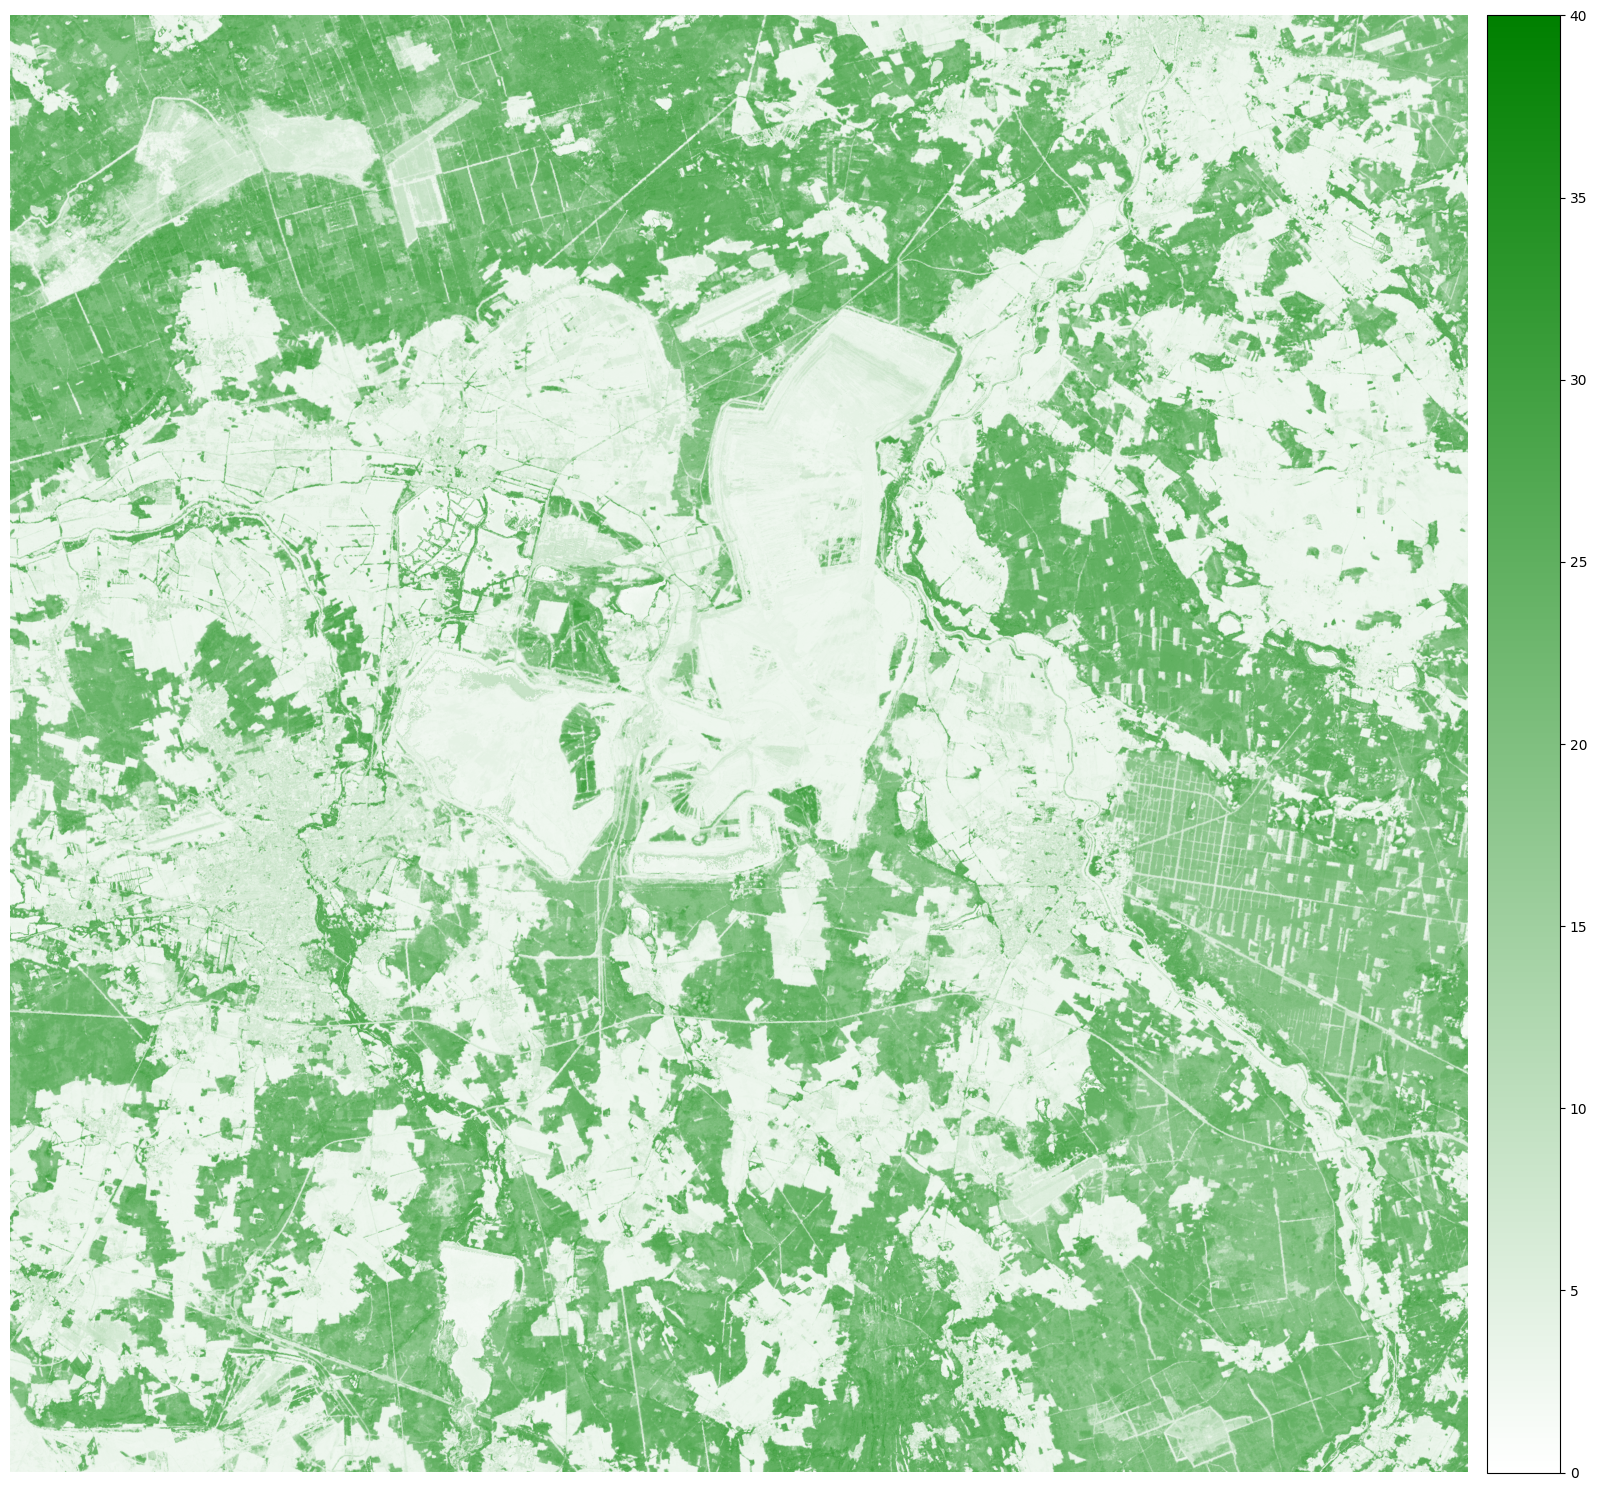

In [3]:
fig, ax = plt.subplots(figsize=(20, 20))
colors = ["white", "green"]
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)
im = ax.imshow(np.load('public_test_xgboost.npy')[0], cmap=cmap, vmin=0, vmax=40)

# Use make_axes_locatable to create axes for the colorbar that match the height of the image.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

plt.colorbar(im, cax=cax)

ax.axis('off')
plt.savefig('Public_Test_XGBoost.png', bbox_inches='tight')
plt.show()